# Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib


# Load Dataset

In [2]:
df = pd.read_csv('E:\MachienLearning\SpaceshipTitanic\data\spaceship-titanic/train.csv')

# Visualization 

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

# Data preprocessing

In [7]:
data_cleaned = df.drop(['PassengerId', 'Name'], axis=1)

In [8]:
data_cleaned.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [10]:
data_cleaned.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [11]:
data_cleaned[["Deck", "Cabin_num", "Side"]] = data_cleaned["Cabin"].str.split("/", expand=True)
data_cleaned = data_cleaned.drop('Cabin', axis=1)

Convert values

In [12]:
label_encoder = LabelEncoder()
data_cleaned['HomePlanet'] = label_encoder.fit_transform(data_cleaned['HomePlanet'])
data_cleaned['CryoSleep'] = label_encoder.fit_transform(data_cleaned['CryoSleep'])
data_cleaned['Destination'] = label_encoder.fit_transform(data_cleaned['Destination'])
data_cleaned['VIP'] = label_encoder.fit_transform(data_cleaned['VIP'])
data_cleaned['Deck'] = label_encoder.fit_transform(data_cleaned['Deck'])
data_cleaned['Side'] = label_encoder.fit_transform(data_cleaned['Side'])
data_cleaned['Transported'] = label_encoder.fit_transform(data_cleaned['Transported'])

In [13]:
data_cleaned[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','RoomService']] = data_cleaned[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']].fillna(value=0)

data_cleaned['Age'].fillna(data_cleaned['Age'].mean(), inplace=True)
data_cleaned['Cabin_num'].fillna(value=0, inplace=True)


In [14]:
data_cleaned['HomePlanet'] = data_cleaned['HomePlanet'].astype(int)
data_cleaned['CryoSleep'] = data_cleaned['CryoSleep'].astype(int)
data_cleaned['Destination'] = data_cleaned['Destination'].astype(int)
data_cleaned['Age'] = data_cleaned['Age'].astype(int)
data_cleaned['VIP'] = data_cleaned['VIP'].astype(int)
data_cleaned['RoomService'] = data_cleaned['RoomService'].astype(int)
data_cleaned['FoodCourt'] = data_cleaned['FoodCourt'].astype(int)
data_cleaned['ShoppingMall'] = data_cleaned['ShoppingMall'].astype(int)
data_cleaned['Spa'] = data_cleaned['Spa'].astype(int)
data_cleaned['VRDeck'] = data_cleaned['VRDeck'].astype(int)
data_cleaned['Transported'] = data_cleaned['Transported'].astype(int)
data_cleaned['Deck'] = data_cleaned['Deck'].astype(int)
data_cleaned['Side'] = data_cleaned['Side'].astype(int)
data_cleaned['Cabin_num']  = data_cleaned['Cabin_num'].astype(int)

Split the dataset

In [15]:
X = data_cleaned.drop('Transported', axis=1).values
y = data_cleaned['Transported'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)

[[   1    0    2 ...    1    0    0]
 [   0    0    2 ...    5    0    1]
 [   1    0    2 ...    0    0    1]
 ...
 [   0    0    2 ...    6 1500    1]
 [   1    0    0 ...    4  608    1]
 [   1    0    2 ...    4  608    1]]


In [17]:
test_df = pd.read_csv('E:\MachienLearning\SpaceshipTitanic\data\spaceship-titanic/test.csv')
submission_id = test_df.PassengerId

In [18]:
test_df = test_df.drop(['PassengerId', 'Name'], axis=1)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

label_encoder = LabelEncoder()
test_df['HomePlanet'] = label_encoder.fit_transform(test_df['HomePlanet'])
test_df['CryoSleep'] = label_encoder.fit_transform(test_df['CryoSleep'])
test_df['Destination'] = label_encoder.fit_transform(test_df['Destination'])
test_df['VIP'] = label_encoder.fit_transform(test_df['VIP'])
test_df['Deck'] = label_encoder.fit_transform(test_df['Deck'])
test_df['Side'] = label_encoder.fit_transform(test_df['Side'])

test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','RoomService']] = test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService']].fillna(value=0)

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Cabin_num'].fillna(value=0, inplace=True)

test_df['HomePlanet'] = test_df['HomePlanet'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['Destination'] = test_df['Destination'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['RoomService'] = test_df['RoomService'].astype(int)
test_df['FoodCourt'] = test_df['FoodCourt'].astype(int)
test_df['ShoppingMall'] = test_df['ShoppingMall'].astype(int)
test_df['Spa'] = test_df['Spa'].astype(int)
test_df['VRDeck'] = test_df['VRDeck'].astype(int)
test_df['Deck'] = test_df['Deck'].astype(int)
test_df['Side'] = test_df['Side'].astype(int)
test_df['Cabin_num']  = test_df['Cabin_num'].astype(int)

# Random forest

Import library

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Random forest

In [34]:
rf_clf = RandomForestClassifier(criterion='log_loss', max_depth=8, max_features='log2', n_estimators=500, random_state=2023, bootstrap=True,class_weight='balanced_subsample',verbose=1)
rf_clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred_RF = rf_clf.predict(X_test)
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred_RF))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.6s


Accuracy: 0.7912593444508338
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       861
           1       0.77      0.83      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


Tune hyperparameters

In [39]:
forest = RandomForestClassifier()
#
# Create parameters for GridSearch & train the model
#
parameters = { 'n_estimators':[ 150, 200, 500],
                'max_features': [None, 'sqrt', 'log2'],
                'max_depth' : [None, 4,5,6,7,8],
                'criterion':['entropy','gini','log_loss'],
                'bootstrap': [True, False]
              }
rf = GridSearchCV(forest, parameters, cv=5, error_score='raise')
rf.fit(X_train, y_train)

print(rf.best_estimator_)


Visualizing

In [35]:
feature_name = data_cleaned.drop('Transported', axis=1)
feature_imp = pd.Series(rf_clf.feature_importances_,index=feature_name.iloc[0].index).sort_values(ascending=False)
feature_imp

CryoSleep       0.172685
Spa             0.142162
VRDeck          0.125408
RoomService     0.119103
FoodCourt       0.098063
ShoppingMall    0.074370
Deck            0.069805
HomePlanet      0.067523
Cabin_num       0.049711
Age             0.044402
Side            0.018276
Destination     0.015474
VIP             0.003019
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


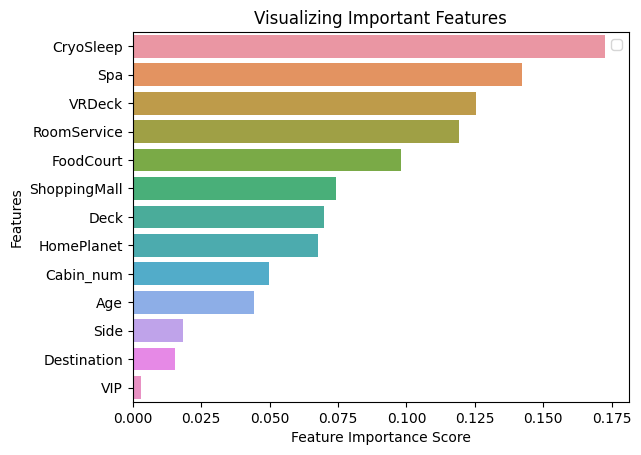

In [36]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

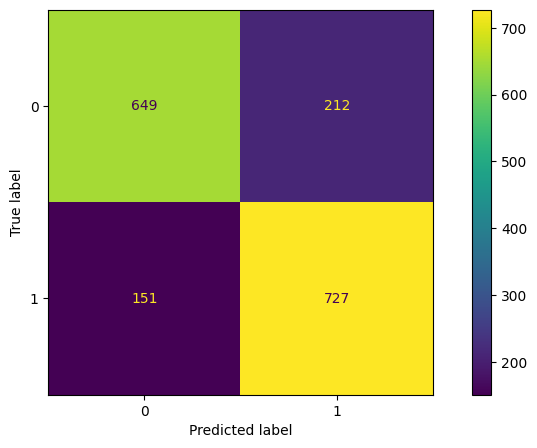

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, ax=ax)


In [38]:


# Get the predictions for testdata
predictions = rf_clf.predict(test_df)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

sample_submission_df = pd.read_csv('E:\MachienLearning\SpaceshipTitanic\data\spaceship-titanic\sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('E:\MachienLearning\SpaceshipTitanic\data\Submission\submission_RF.csv', index=False)
sample_submission_df.head()

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
